## Quantum Key Distribution for a Channel
- Quantum Key ditribution for this lab 
- **OBJECTIVES** : Generating random keys and sending it over through simulation

In [10]:
import numpy as np 
from qiskit import * 
from random import getrandbits

- **KEY** : It is important for the sender and reciever to communicate through a KEY, something secret that is only known to them. KEY is used for encoding and decoding messages that are sent

- QKD allows us to establish a shared key which is RANDOM.
- Both have the same sequence of **0s and 1s**
- Alice and Bob **DON'T HAVE TO MEET EACH OTHER EVEN ONCE**
- This key is STILL TRANSFERRED SECRETLY.

### GOAL 
- To **ESTABLISH A CONNECTION WITH A SECRET and RANDOM KEY**
- This is a **symmetric key distribution**
​
# This is a 100% secure key distribution technique
​
### It employs quantum mechanics to get the knowledge about whether your key was tampered with or not
​
Note : the information being transferred is just CLASSICAL but KEY BEING TRANSFERRED IS TRANSFERRED THROUGH A QUANTUM CHANNEL

## STEPS 

### Pre - Knowledge 
- **You need to establish the length of the KEY**
- Here -> **KEY : 500 bits**
- Also we have a quantum and a classical channel

In [11]:
length_key = 600
q_channel = []
c_channel = []


## Step1 : Alice selects bit-string and bases
- Generate 500 bits that are random 
- Then generate another 500 bits to specify the **basis**

In [12]:
def select_encoding(length):
    # To store the random 0 / 1
    alice_bits = ""
    # to store the random vertical or diagonal bases 
    alice_bases = ""
    
    for _ in range(length):
        # just use randbits and append to the end of the string
        alice_bits += str(getrandbits(1))
        alice_bases += str(getrandbits(1))
        
    return alice_bits, alice_bases

In [13]:
alice_bits, alice_bases = select_encoding(length_key)
print("Alice's bits (first 20 bits) :",alice_bits[:20],"\n")
print("Alice's basis string (first 20 bits) :",alice_bases[:20])

Alice's bits (first 20 bits) : 11000000000010110101 

Alice's basis string (first 20 bits) : 11010101011010110110


## Step2 : Bob selects bases
- BOB NEEDS TO SELECT **only bases**
- Why? **BOB ONLY SELECTS THE BASES IN WHICH HE NEEDS TO MEASURE**

In [14]:
def select_bob_measurement(length):
    bob_bases = ""
    # bob selects the bases in which he wants to measure
    for _ in range(length):
        bob_bases += str(getrandbits(1))
        
    return bob_bases

In [15]:
bob_bases = select_bob_measurement(length_key)
print("Bob's string:",bob_bases[:20])

Bob's string: 11100101011110110111


## Step 3: Encode : All alice

Alice now uses her random list of numbers to generate a bunch of quantum states:
In this excercise we are going to represent the creation of a qubit as an individual `QuantumCircuit` object.

The table below summarizes the qubit states Alice sends, based on the bit of Alice's `alice_bitstring` the corresponding bit of `selected_bases`:

| Bit in Alice's `alice_bitstring` | Corresponding bit in `selected_bases` | Encoding basis | Qubit state sent |
|:----------------:|:--------------------------:|:--------------------------:|:---------------:|
| 0 | 0 | $$|0\rangle,|1\rangle$$ |$$|0\rangle$$ |
| 0 | 1 | $$|+\rangle,|-\rangle$$ |$$|+\rangle$$ |
| 1 | 0 | $$|0\rangle,|1\rangle$$ |$$|1\rangle$$ |
| 1 | 1 | $$|+\rangle,|-\rangle$$ |$$|-\rangle$$ |

In [16]:
def generate_zqubit(q):
    Q = QuantumCircuit(1,1)
    if(int(q) == 1):
        Q.x(0)
    return Q
    
def generate_xqubit(q):
    Q = QuantumCircuit(1,1)
    if(int(q) == 0):
        Q.h(0)
    else:
        Q.x(0)
        Q.h(0)
    return Q
        

In [17]:
def encoded_qubits(alice_bits,alice_bases):
    '''Encoded qubits : returns a list of QuantumCircuits with 
                         each QuantumCircuit representing a qubit'''
    encoded = []
    for i,k in zip(alice_bits,alice_bases):
        
#         print(" Alice bit :",i,"Basis :",k)

        if(i == '0' and k == '0'):
            # encoding is + and qubit would be |0>
            q = generate_zqubit(i)
        if(i == '1' and k == '0'):
            # encoding is + and qubit would be |1> 
            q = generate_zqubit(i)
        if(i == '0' and k == '1'):
            # encoding is x and qubit would be |+>
            q = generate_xqubit(i) 
        if(i == '1' and k == '1'):
            q = generate_xqubit(i)
#         display(q.draw('mpl'))
        # now append the qubit in the channel 
        encoded.append(q)
    
    return encoded  
    

In [18]:
encoded_alice_bits = encoded_qubits(alice_bits,alice_bases)

## Step4 : All alice
- Send the qubits that you have to the **q_channel** 
- These qubits are just assigned to the quantum channel

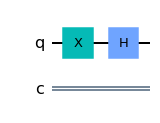

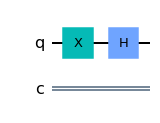

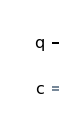

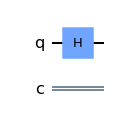

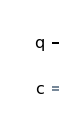

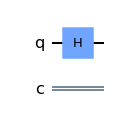

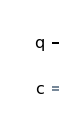

In [19]:
q_channel = encoded_alice_bits
for k in q_channel[:7]:
    display(k.draw('mpl'))

## EVE intercepts

## E1. Eve selects bases

In [20]:
def select_eve_bases(length):
    eve_bases = ""
    for _ in range(length):
        b = getrandbits(1)
        eve_bases+=(str(b))
    
    return eve_bases

In [21]:
eve_bases = select_eve_bases(length_key)
print("First 20 random bases that Eve selected :",eve_bases[:20])

First 20 random bases that Eve selected : 10100101101110001101


## E2. Eve intercepts the Channel

In [22]:
def measure_eve(eve_bases,encoded_qubits,backend):
    # Eve would perform a measurement on the recieved state in the quantum channel 
    
    eves_bitstring = ""
    
    for i in range(len(eve_bases)):
        b = eve_bases[i]
        q = encoded_qubits[i]
        
        # see which basis did Eve select
        if b == '0':
            # means Eve chose Z basis 
            q.measure(0,0)
        else:
            # means Eve chose the X basis
            # applying a hadamard transform to measure in the x basis
            q.h(0)
            q.measure(0,0)
            
        counts = execute(q,backend=backend,shots=1).result().get_counts()
        # get the counts of values measured
        measure_bit = max(counts, key = counts.get) 
        eves_bitstring+= str(measure_bit)
    
    return eves_bitstring
            

In [23]:
backend = Aer.get_backend('qasm_simulator')
eve_bits = measure_eve(eve_bases,q_channel,backend)
print("Eve measured :",eve_bits[:30],"...")

Eve measured : 110000000100100011110010110111 ...


## E3. Now Eve encodes

In [24]:
def encode_eve(eve_bitstring, eve_bases):
    # encode the bit string that you measured 
    encoded_bits = []
    for i in range(len(eve_bases)):
        bit = eve_bitstring[i]
        base = eve_bases[i]
        # check the base
        if(base == '0'): # z basis
            q = generate_zqubit(bit)
        else: # x basis
            q = generate_xqubit(bit)
        # append qubit to channel
        encoded_bits.append(q)
    
    return encoded_bits


In [25]:
encoded_eve_bits = encode_eve(eve_bits,eve_bases)
q_channel = encoded_eve_bits

In [26]:
print("Eve intercepted, Let us see what Bob does now")

Eve intercepted, Let us see what Bob does now


## Step5 : Bob Measures
- Bob now has to measure the qubits in the **RANDOM BASES THAT HE CHOSE IN PART 2**
- Note : At the end of the measurement at Bob's end, **he does not have the key, just HIS MEASUREMENTS**

### SHOTS = 1 is important for simulation

In [27]:
def measure_key(bob_bases, encoded_qubits,backend):
    # Perform the measurement on the qubits you recieved from Alice
    
    # This is because Bob is going to need to measure the qubit he 
    # has recieved 
    
    # Bob's bases need not be the same as the bases of Alice
    
    bob_bitstring = ""
    for i,k in zip(bob_bases,encoded_qubits):
        if i == '0':
            # bob chose the Z basis
            k.measure(0,0)
        else:
            # bob chose the x basis
            k.h(0) # why? because this is going to bring our |+> as a |0> # and it is going to bring |-> into |1>
            k.measure(0,0) 
        
        counts = execute(k,backend=backend,shots= 1).result().get_counts()
        
        # max with a key is just a max function which gets the key with the maximum value
        measure_bit = max(counts, key = counts.get) 
        bob_bitstring += str(measure_bit)
    
    return bob_bitstring
            

In [28]:
sim_backend = Aer.get_backend('qasm_simulator')
bob_string = measure_key(bob_bases,q_channel,sim_backend)

In [29]:
bob_string[:100]

'1100000001001000011100111101111010100010100111001011010101100010000111010101101110111111100010011101'

In [30]:
alice_bits == bob_string

False

## The above reasoning justifies that this result as Eve did intercept the call.